In [1]:
%matplotlib inline

In [2]:
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 100
rcParams["savefig.dpi"] = 150

# import maelstrom as ms
import numpy as np
import corner
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm


In [3]:
import numpy as np
from lightkurve import search_lightcurvefile

def get_lightcurve(target, **kwargs):
    lc_collection = search_lightcurvefile(target, **kwargs).download_all()

    lc = lc_collection[0].PDCSAP_FLUX.normalize()
    for l in lc_collection[1:]:
        lc = lc.append(l.PDCSAP_FLUX.normalize())

    lc = lc.remove_nans()
    magnitude = -2.5 * np.log10(lc.flux)
    magnitude = magnitude - np.average(magnitude)
    return lc.time, magnitude

times, mags = get_lightcurve('KIC 4168574', cadence='long')
times += 2454833

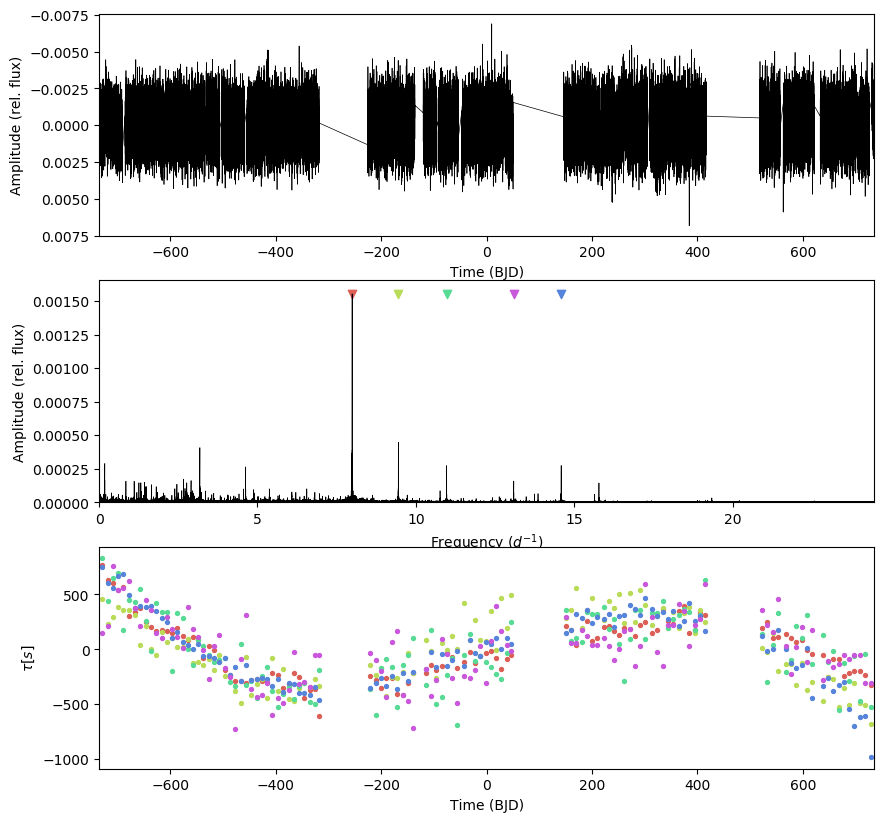

In [4]:
from maelstrom import Maelstrom

ms = Maelstrom(times, mags, fmin=5, fmax=20, max_peaks=5)
ms.setup_orbit_model(period=1563)
ms.first_look()

In [5]:
pb1 = ms.pin_orbit_model()

In [6]:
t, rv, err = np.loadtxt('/Users/danielhey/Downloads/kic4168574a_JDrv.txt', delimiter=',', usecols=(0,1,2)).T
pb1.add_radial_velocity(t,rv,err,lighttime='a')

t, rv, err = np.loadtxt('/Users/danielhey/Downloads/kic4168574b_JDrv.txt', delimiter=',', usecols=(0,1,2)).T
pb1.add_radial_velocity(t,rv,err,lighttime='b')

In [7]:
pb1.optimize()

optimizing logp for variables: ['PB1_W_hat_sin', 'PB1_W_hat_cos', 'PB1_mean_flux']
message: Desired error not necessarily achieved due to precision loss.
logp: 291649.6862979477 -> 291650.04181827675
optimizing logp for variables: ['PB1_W_hat_sin', 'PB1_W_hat_cos', 'PB1_mean_flux', 'PB1_logs']
message: Desired error not necessarily achieved due to precision loss.
logp: 291650.04181827675 -> 291650.04742669995
optimizing logp for variables: ['PB1_t0', 'PB1_lighttime_a']
message: Optimization terminated successfully.
logp: 291650.04742669995 -> 291696.36813146214
optimizing logp for variables: ['PB1_W_hat_sin', 'PB1_W_hat_cos', 'PB1_mean_flux', 'PB1_logs']
message: Desired error not necessarily achieved due to precision loss.
logp: 291696.36813146214 -> 291696.8896110154
optimizing logp for variables: ['PB1_t0', 'PB1_logperiod']
message: Desired error not necessarily achieved due to precision loss.
logp: 291696.8896110154 -> 291868.35486151517
optimizing logp for variables: ['PB1_varpi_a

{'PB1_logperiod': array(7.03509544),
 'PB1_t0': array(468.2721157),
 'PB1_varpi_angle__': array([ 0.98938695, -4.3613202 ]),
 'PB1_eccen_interval__': array(-0.11468617),
 'PB1_logs': array(-7.01647649),
 'PB1_lighttime_a': array(382.79972801),
 'PB1_gammav': array(-23.55629419),
 'PB1_mean_flux': array(2.75159885e-08),
 'PB1_W_hat_cos': array([ 1.54653729e-03, -2.20080529e-04,  2.08084765e-04, -2.69416787e-04,
         3.63220237e-05]),
 'PB1_W_hat_sin': array([2.79560435e-04, 4.03264781e-04, 1.84840429e-04, 8.92742365e-05,
        1.55498139e-04]),
 'PB1_logs_RV_a': array(0.88356468),
 'PB1_logs_RV_b': array(2.57842607),
 'PB1_lighttime_b': array(-112.45112679),
 'PB1_period': array(1135.80330663),
 'PB1_varpi': array(2.91851337),
 'PB1_eccen': array(0.47136042),
 'PB1_tref': array(563.30752097)}

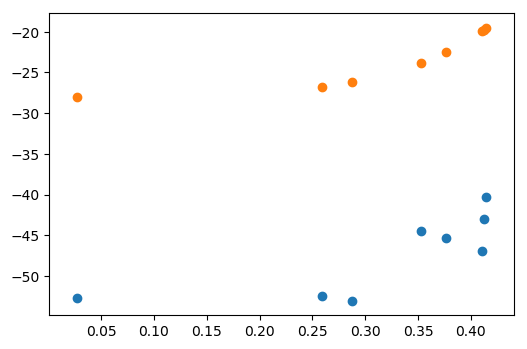

In [16]:
t, rv, err = np.loadtxt('/Users/danielhey/Downloads/kic4168574a_JDrv.txt', delimiter=',', usecols=(0,1,2)).T
plt.scatter(t % 1135.8 /1135.8, rv-23.55629419)
plt.scatter(t % 1135.8 /1135.8, pb1.evaluate(pb1.rv_vrad_a))

In [10]:
pb1.optimize(pb1.logperiod)

optimizing logp for variables: ['PB1_logperiod']
message: Desired error not necessarily achieved due to precision loss.
logp: 292525.66379374824 -> 292525.66379374824


{'PB1_logperiod': array(7.03509544),
 'PB1_t0': array(468.2721157),
 'PB1_varpi_angle__': array([ 0.98938695, -4.3613202 ]),
 'PB1_eccen_interval__': array(-0.11468617),
 'PB1_logs': array(-7.01647649),
 'PB1_lighttime_a': array(382.79972801),
 'PB1_gammav': array(-23.55629419),
 'PB1_mean_flux': array(2.75159885e-08),
 'PB1_W_hat_cos': array([ 1.54653729e-03, -2.20080529e-04,  2.08084765e-04, -2.69416787e-04,
         3.63220237e-05]),
 'PB1_W_hat_sin': array([2.79560435e-04, 4.03264781e-04, 1.84840429e-04, 8.92742365e-05,
        1.55498139e-04]),
 'PB1_logs_RV_a': array(0.88356468),
 'PB1_logs_RV_b': array(2.57842607),
 'PB1_lighttime_b': array(-112.45112679),
 'PB1_period': array(1135.80330663),
 'PB1_varpi': array(2.91851337),
 'PB1_eccen': array(0.47136042),
 'PB1_tref': array(563.30752097)}

In [16]:
trace = pb1.sample(tune=2000, draws=2000)

success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: True
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: True
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267
success: False
initial logp: 290830.8152621267
final logp: 290830.8152621267


Sampling 2 chains: 100%|██████████| 604/604 [33:37<00:00,  4.72s/draws]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [PB1_lighttime_b, PB1_logs_RV_b, PB1_logs_RV_a, PB1_W_hat_sin, PB1_W_hat_cos, PB1_mean_flux, PB1_gammav, PB1_lighttime_a, PB1_logs, PB1_eccen, PB1_varpi, PB1_t0, PB1_logperiod]
Sampling 2 chains: 100%|██████████| 2000/2000 [1:34:59<00:00,  3.02s/draws]
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [22]:
pb1.get_period_estimate()

1000.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c42b76d68>,
      dtype=object)

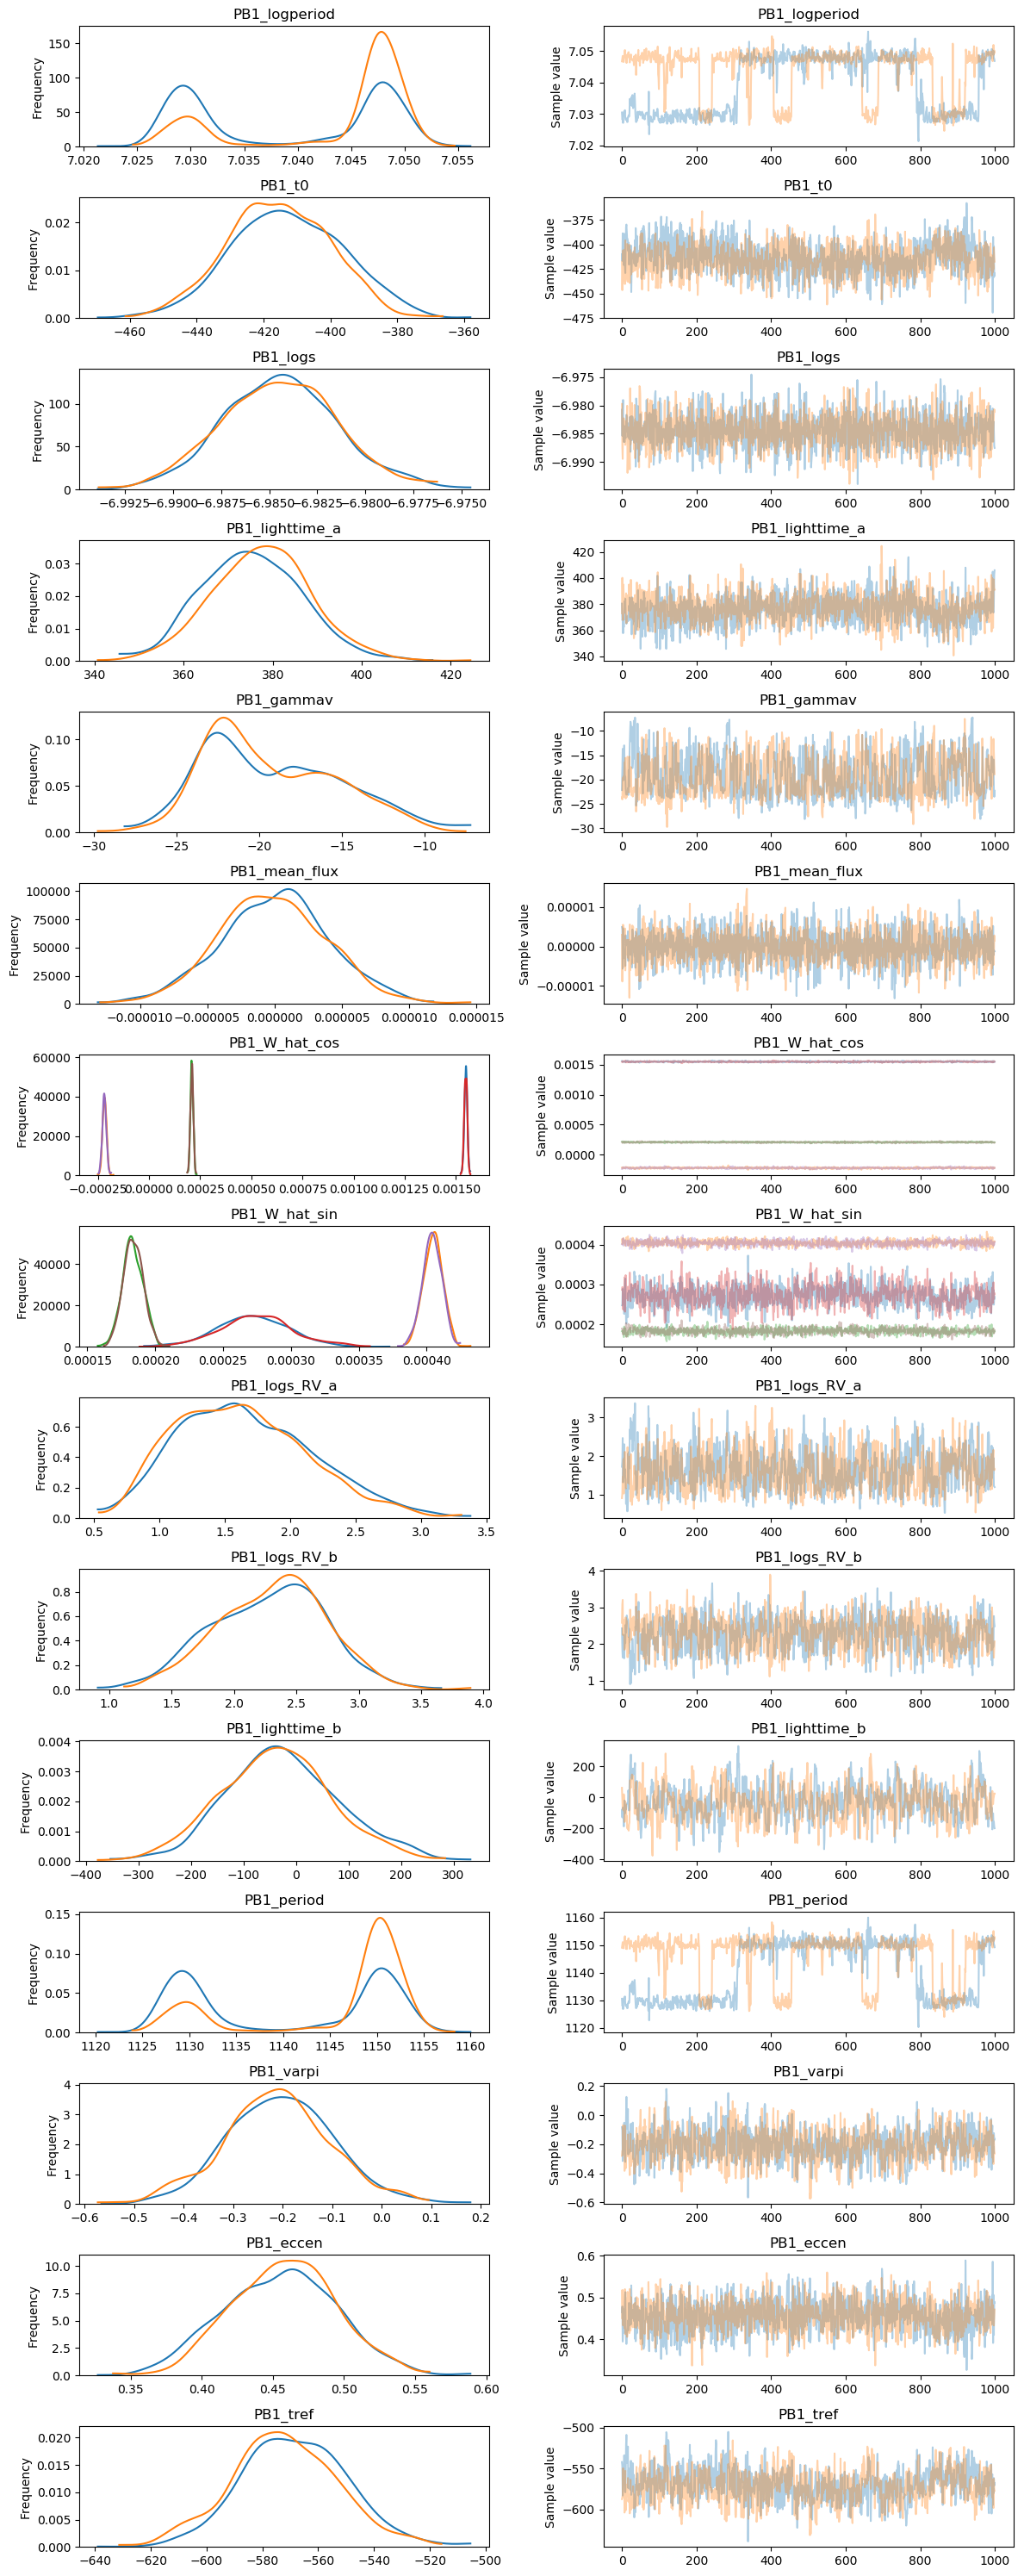

In [18]:
pm.traceplot(trace)

In [20]:
pm.summary(trace, varnames=['PB1_period','PB1_lighttime_a','PB1_lighttime_b','PB1_varpi','PB1_eccen','PB1_tref','PB1_t0','PB1_gammav','PB1_logs_RV_a','PB1_logs_RV_b'])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
PB1_period,1142.944628,10.051014,0.927171,1126.857174,1153.326652,13.484858,1.073060
PB1_lighttime_a,376.243898,11.199388,0.398261,355.099419,398.420523,184.707037,1.009858
PB1_lighttime_b,-31.985506,106.475657,5.390221,-238.878371,187.902677,354.525797,1.005024
PB1_varpi,-0.209119,0.107236,0.003871,-0.438193,-0.004373,539.125206,1.001980
PB1_eccen,0.456051,0.037796,0.001091,0.382902,0.528280,716.611758,1.001470
PB1_tref,-570.548474,18.940268,0.922819,-608.959715,-533.051328,131.867833,1.011880
PB1_t0,-414.418814,15.976743,0.664882,-447.143121,-385.303866,133.073950,1.008045
PB1_gammav,-19.232233,4.104494,0.184753,-25.912703,-11.202709,320.275905,1.000866
PB1_logs_RV_a,1.643955,0.506902,0.021492,0.729976,2.624270,389.776015,1.001871
PB1_logs_RV_b,2.287715,0.439650,0.016652,1.431968,3.104576,567.131955,1.001845
